<a href="https://colab.research.google.com/github/NetraBatwe/Word2vec/blob/main/CBOW_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [65]:
corpus = '''NLP drives computer programs that translate text from one language to another,
 respond to spoken commands, and summarize large volumes of text rapidly—even in real time.
  There is a good chance you’ve interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, 
  customer service chatbots, and other consumer conveniences. But NLP also plays a growing role in enterprise solutions that help streamline business operations, 
  increase employee productivity, and simplify mission-critical business processes.Natural language processing is an interdisciplinary subfield of linguistics, computer science, 
  and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. 
  The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and
  insights contained in the documents as well as categorize and organize the documents themselves.
Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.'''.split()



In [ ]:
vocabulary =set(corpus)
word2idx = {w: index for (index, w) in enumerate(vocabulary)}
idx2word = {index: w for (index, w) in enumerate(vocabulary)}

vocab_size = len(vocabulary)
length_of_corpus = len(corpus)
print(vocab_size)
print(word2idx)
print(idx2word)

In [ ]:
data = []
labels = []
n = 0
for i in range(2, len(corpus) - 2):
  n +=1
  context_vec = [word2idx[corpus[i - 2]], word2idx[corpus[i - 1]],
                word2idx[corpus[i + 1]], word2idx[corpus[i + 2]]]
  context_vec = torch.tensor(context_vec, dtype=torch.long)
  context = F.one_hot(context_vec, num_classes = vocab_size)
  context = torch.sum(context, dim = 0, keepdim = True)
  target = torch.tensor(word2idx[corpus[i]])
  labels.append(target)
  target = F.one_hot(target, num_classes = vocab_size)
  data.append((context, target))
print(n)

In [68]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
      super(CBOW, self).__init__()
      self.L1 = nn.Linear(vocab_size, embedding_dim, bias = False)
      self.L3 = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
      out = F.relu(self.L1(x))
      out = F.softmax(self.L3(out), dim = 1)
      return out

In [69]:
model = CBOW(vocab_size, 16)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
loss_func = []
accuracy = []

for i in range(0,1000):
  loss = 0
  acc = 0
  for k, (context, target) in enumerate(data):
    output = model(context.float())
    loss += criterion(output.squeeze(0), target.float())
    _, predicted = torch.max(output.data , 1)
    if(predicted == labels[k]):
      acc += 1
  loss_func.append(float(loss))
  accuracy.append(acc/n*100)
  if(i%100 == 0):
    print(loss)
    print(acc/n*100)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

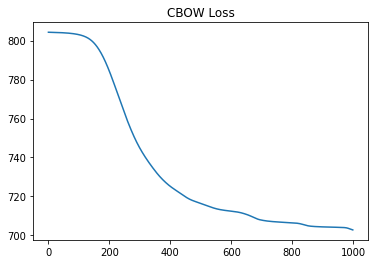

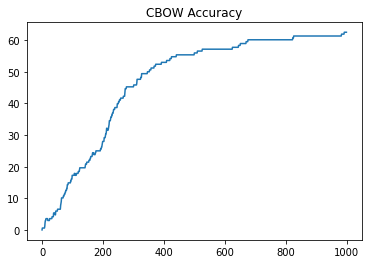

In [71]:
plt.plot(loss_func)
plt.title("CBOW Loss")
plt.show()
plt.plot(accuracy)
plt.title("CBOW Accuracy")
plt.show()

In [ ]:
text=input("Enter the text: ")
text=text.split()
idx_vec=[word2idx[text[0]],word2idx[text[1]],word2idx[text[2]],word2idx[text[3]],word2idx[text[4]]]
idx_vec = torch.tensor(idx_vec, dtype = torch.long)
context = F.one_hot(idx_vec, num_classes = vocab_size)
context = torch.sum(context, dim = 0, keepdim = True)
output = model(context.float())
_, predicted = torch.max(output.data , 1)
print("Predicted word is : ", idx2word[int(predicted)])



In [ ]:
for name, param in model.named_parameters():
  if 'L1.weight' in name:
    embed = param.detach().numpy()
    embed = embed.T
    print('Embedding shape : ', embed.shape)
    print(embed)

In [87]:
def PCA(embedding):
  corr = np.corrcoef(embedding)
  values,vectors = np.linalg.eig(corr)
  args = (-values).argsort()
  values = vectors[args]
  vectors = vectors[:, args]
  new_vectors=vectors[:,:2]
  return np.multiply(embedding[:,:2], new_vectors)

(120, 2)


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:690: ComplexWarning: Casting complex values t

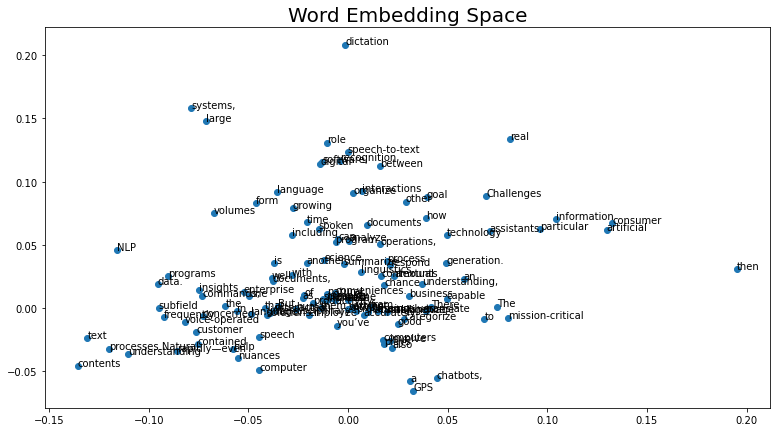

In [89]:
pca = PCA(embed)
print(pca.shape)
plt.figure(figsize=(13,7))
plt.scatter(pca[:,0], pca[:,1])
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(vocabulary):
  plt.annotate(word,xy=(pca[i,0],pca[i,1]))